In [1]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null
#한글 폰트 설치 런타임 다시시작

In [1]:
!pip install konlpy > /dev/null

In [40]:
from google.colab import files
uploaded = files.upload()
textfile = list(uploaded.keys())[0]

Saving iphone13.txt to iphone13.txt


In [41]:
uploaded = files.upload()
maskfile = list(uploaded.keys())[0]

Saving apple.png to apple.png


In [42]:
with open(textfile) as fp:
    text = fp.read()

In [43]:
from konlpy.tag import Okt
okt = Okt()


In [44]:
tokens = okt.nouns(text)
tokens[:10]

['아이폰', '애플', '페이', '지원', '무산', '확정', '스펙', '자체', '인식', '아이폰']

In [45]:
import re
new_tokens = []
for token in tokens:
    item = re.sub('[A-Za-z0-9]', '', token)
    if item:
        new_tokens.append(item)

In [46]:
#한글폰트 사용
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

In [47]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

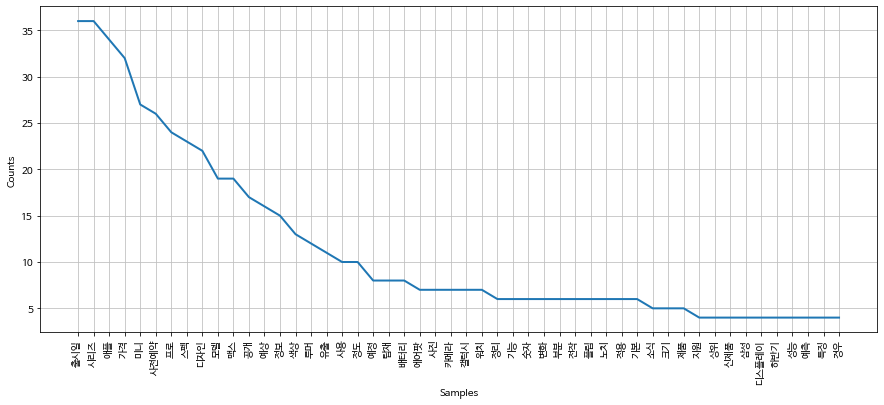

In [95]:
gift = nltk.Text(new_tokens, name ='스마트폰')
plt.figure(figsize=(15,6))
gift.plot(50)
plt.show()

In [92]:
stoptext = """ 전 것 이번 더 이 및 외 수 또한 이제 계 요 현재 대한 종 바로 관련 그냥 곳 의 끗 때 저 를 종 때문 다음  등 중 사람 올해 
여러분 아이폰 지금 최근 최신 역대 그 폰 계 역시 과연 제 은 이야기 출시
"""

#찍어보고 계속 스탑워드 추가 하여 정제함

In [93]:
stop_words =  stoptext.split()
#stop_words

In [94]:
new_tokens = [word for word in new_tokens if word not in stop_words]
new_tokens[:10]

['애플', '페이', '지원', '무산', '확정', '스펙', '자체', '인식', '애플', '페이도']

In [96]:
from wordcloud import WordCloud
from PIL import Image


In [97]:
data = gift.vocab().most_common(300)
gift.vocab().most_common(300)
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
wc = WordCloud(font_path=path, relative_scaling=0.2, background_color='white').generate_from_frequencies(dict(data))


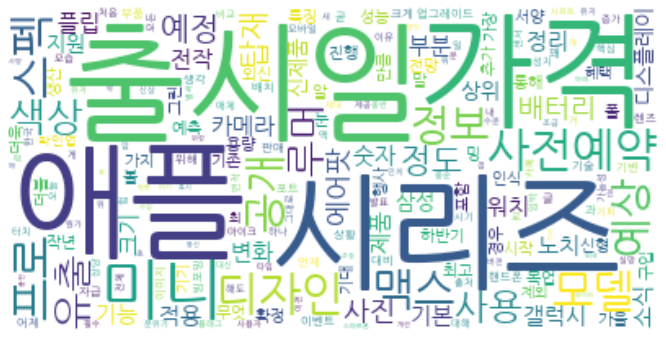

In [98]:
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [99]:
mask = np.array(Image.open(maskfile))
from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask)

In [100]:
 
wc = WordCloud(font_path=path, relative_scaling=0.2, background_color='white', mask=mask, ).generate_from_frequencies(dict(data))
 
default_color = wc.to_array

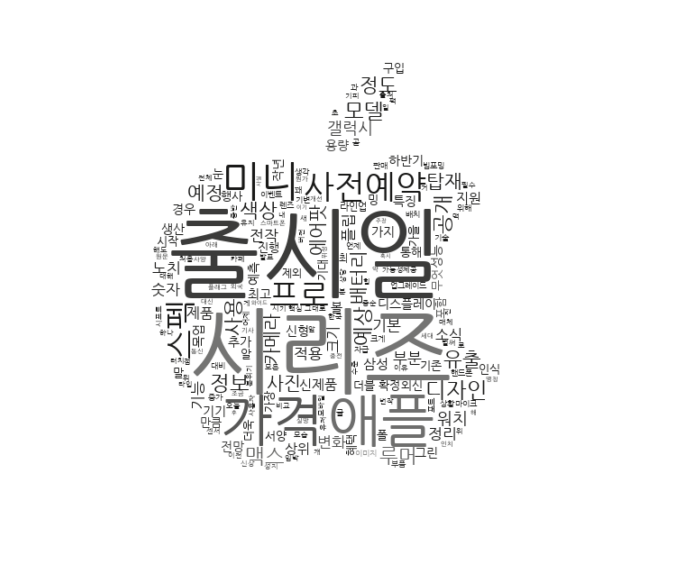

In [108]:
plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.savefig('ip13.png', bbox_inches='tight')
plt.show()


<Figure size 432x288 with 0 Axes>